In [276]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfde import Simple_CF_Descent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Naive CF-Descent

This file contains the initial attempts at making CF-Descent work and tests to see it's validity

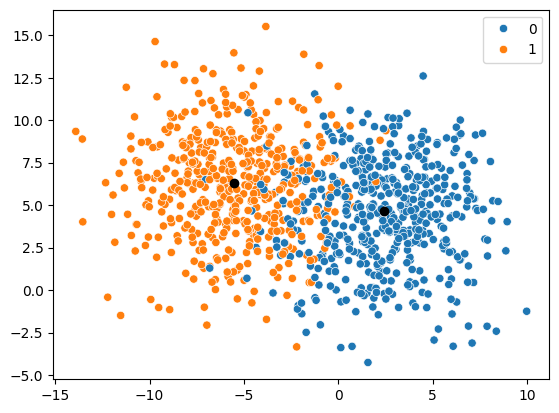

In [277]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [278]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,-5.552486,4.095862,1.0
1,7.188597,7.628787,0.0
2,3.977892,5.866009,0.0
3,-7.694953,6.296020,1.0
4,1.309034,7.464639,0.0
...,...,...,...
995,-10.017184,4.904863,1.0
996,-5.968097,11.043445,1.0
997,4.199903,6.664536,0.0
998,-4.110755,6.212065,0.0


In [279]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

Generation counterfacutal from cluster: 0.0 , Into cluster: 1.0
Features that can be changed count:  1
Amount of changes:  36
Number of changed features: 1


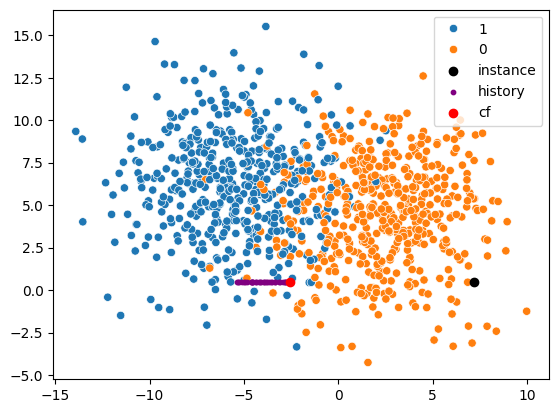

In [280]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

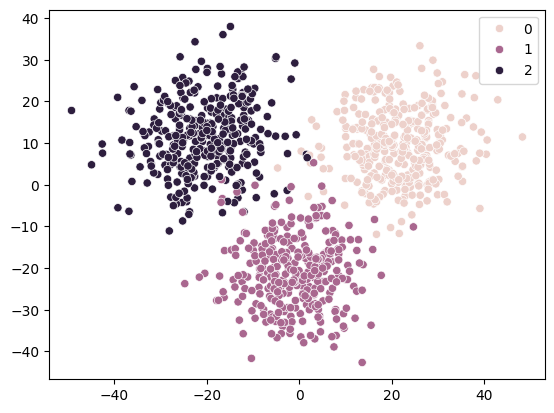

In [281]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [282]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,-2.291381,-2.785437,17.133840,11.786984,-1.325653,3.411031,-14.213884,-0.349521,-12.842577,-13.955979,...,-9.872167,1.826366,-3.242114,-8.540934,17.476081,-3.712662,-2.049874,6.820122,-13.228507,1.0
1,-3.727500,-17.411158,-10.867561,-1.630127,-6.434578,15.022180,-9.748140,11.397606,-3.341318,-6.113198,...,3.886570,3.016051,7.490492,-3.434635,9.188780,-10.743217,6.501339,4.845733,-5.777364,1.0
2,-15.011230,-5.228103,-13.599385,5.906487,4.306528,0.375668,3.177980,10.824397,-4.829884,8.430979,...,7.732659,17.587287,7.424952,9.570188,11.091446,-2.040887,-4.512846,-3.648339,1.871519,0.0
3,-10.689422,0.998395,-19.632811,5.136912,-17.764788,-14.637574,-8.366157,-1.621925,-8.888963,2.151460,...,-8.342012,19.817759,13.169489,5.517318,1.110050,6.846237,9.794115,-8.688321,4.311314,0.0
4,-2.613015,-20.105602,1.967275,1.731153,3.534248,-11.317237,1.030500,0.617914,-6.368216,-11.667893,...,-8.525375,-4.876895,-2.106397,4.673833,7.775734,2.024131,0.263597,12.316036,-5.134394,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-7.185681,-7.851440,3.713301,-5.513752,7.732335,-1.236645,6.060410,-21.792268,-11.693918,-21.681845,...,16.580538,-4.380937,-19.688739,13.660942,4.136085,7.767818,1.548189,-1.639380,-10.771307,2.0
996,1.891391,-18.179599,-3.996260,10.481567,13.593622,-4.728277,-4.913107,-11.499576,6.290757,8.082421,...,-2.472820,2.454515,-14.004195,-18.682357,12.366692,-4.895283,-11.764440,4.803936,-0.733389,1.0
997,2.240522,-10.274206,4.380744,-0.518494,10.542431,-3.146370,-5.654180,-9.002109,-13.915898,-10.257968,...,1.577574,-11.659755,-4.218396,1.023833,-3.112838,5.535809,-4.454255,6.707478,-3.857731,2.0
998,-14.024833,-12.500018,-0.145322,25.041938,-13.713309,17.225625,-8.504474,-20.970312,-3.153817,3.587707,...,9.041282,-2.668650,2.685651,-4.297534,7.801027,-26.926055,-3.893447,6.312963,12.622802,1.0


In [283]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

Generation counterfacutal from cluster: 2.0 , Into cluster: 1.0
Features that can be changed count:  14
Amount of changes:  2
Number of changed features: 2


In [284]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

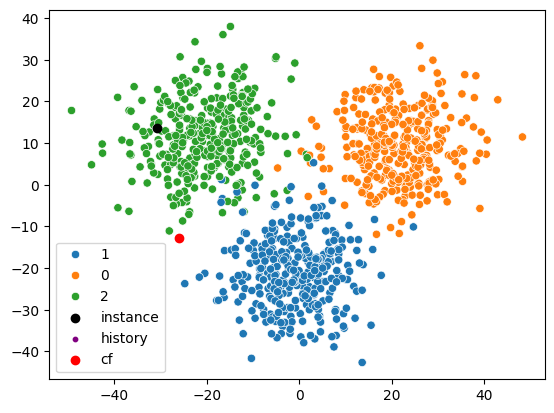

In [285]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.legend()